### Contents:
5. Customer Profiling. Create a profiling variable based on:
- 5.1 Customer Profiling: Age
- 5.2 Customer Profiling: Income
- 5.3 Customer Profiling: Certain goods in the “department_id” column
- 5.4 Customer Profiling: Number of dependants
- 5.5 Profiling the Ordering Time

### 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\Windows 10\Documents\04-2023 Instacart Basket Analysis'

In [3]:
# Import data

df_project_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'project_all.pkl'))

In [4]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

### 5.3 Customer Profiling: Certain goods in the “department_id” column

In [5]:
# Importing the department.csv

df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [6]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
# Renaming the column name

df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [8]:
df_project_all['department_id'].head()

0    7
1    7
2    7
3    7
4    7
Name: department_id, dtype: int64

In [9]:
# Due to a memory error, I couldn't merge df_dept and df_project_all, therefore I used another method by adding one column using a for loop
# Create a new variable (department) and assign department_id to department variable using for loop

department = []

for value in df_project_all['department_id']:
    if value == 1:
        department.append('frozen')
    elif value == 2:
        department.append('other')
    elif value == 3:
        department.append('bakery')
    elif value == 4:
        department.append('produce')
    elif value == 5:
        department.append('alcohol')
    elif value == 6:
        department.append('international')
    elif value == 7:
        department.append('beverages')
    elif value == 8:
        department.append('pets')
    elif value == 9:
        department.append('dry goods pasta')
    elif value == 10:
        department.append('bulk')
    elif value == 11:
        department.append('personal care')
    elif value == 12:
        department.append('meat seafood')
    elif value == 13:
        department.append('pantry')
    elif value == 14:
        department.append('breakfast')
    elif value == 15:
        department.append('canned goods')
    elif value == 16:
        department.append('dairy eggs')
    elif value == 17:
        department.append('household')
    elif value == 18:
        department.append('babies')
    elif value == 19:
        department.append('snacks')
    elif value == 20:
        department.append('deli')
    else:
        department.append('missing')

In [10]:
# Insert department as column in df_project_all

df_project_all['department'] = department

In [11]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 35 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [12]:
df_project_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,dependants_number,family_status,income,age_group,region,income_group,department
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,30-39 years,South,Low-income,beverages
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,30-39 years,South,Low-income,beverages
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,30-39 years,South,Low-income,beverages
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,30-39 years,South,Low-income,beverages
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,30-39 years,South,Low-income,beverages


In [13]:
# Create a crosstab between the 'department' and 'age_group' column

crosstab_department_age = pd.crosstab(df_project_all['department'], df_project_all['age_group'], dropna = False)
crosstab_department_age

age_group,30-39 years,40-49 years,50-59,60-69 years,70+ years,Less than 30 years
department,,,,,,
alcohol,25118,23973,24170,22837,27827,29771
babies,65909,69248,65269,64885,78027,80464
bakery,183863,184533,183655,180137,219883,220357
beverages,414617,425165,425090,412810,510898,499543
breakfast,108948,111180,109714,106557,132340,134294
bulk,5396,5581,5187,5368,6435,6606
canned goods,166296,167484,167598,165143,198595,202942
dairy eggs,852077,854998,835589,823787,1014295,1018001
deli,164566,165955,163792,162935,196567,197434


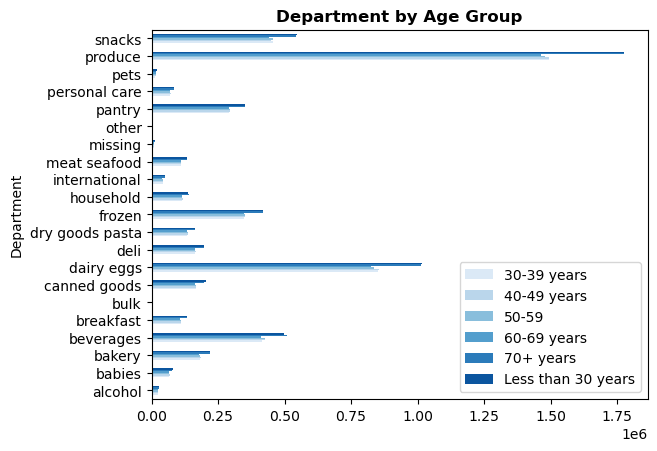

In [14]:
# Creating a bar chart of department divided by age group

bar_department_age = crosstab_department_age.plot.barh(color = sns.color_palette('Blues', 6))
plt.ylabel('Department')
plt.legend()
plt.title('Department by Age Group', fontweight = 'bold')
plt.show()

In [72]:
# Exporting bar_department_age

bar_department_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_age.png'))

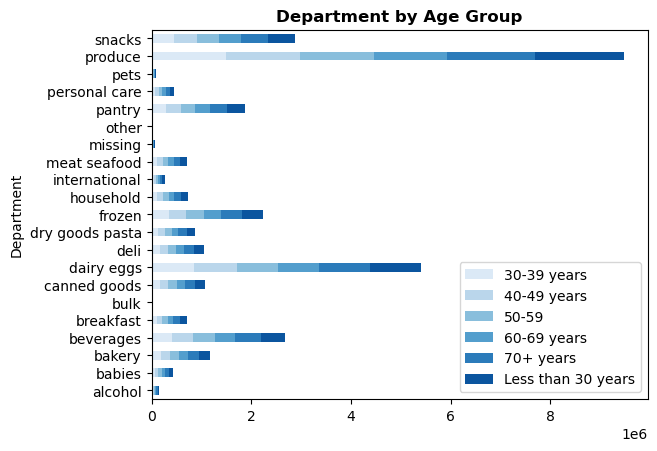

In [16]:
# Creating a stacked bar chart of department divided by age group

bar_department_age2 = crosstab_department_age.plot.barh(stacked = True, color = sns.color_palette('Blues', 6))
plt.ylabel('Department')
plt.legend()
plt.title('Department by Age Group', fontweight = 'bold')
plt.show()

In [73]:
# Exporting bar_department_age2

bar_department_age2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_age2.png'))

#### Observation:
1. Through the crosstab and the images above, I can see that most of the products are dominated by people aged less than 30 years and over 70 years
2. The best seller products come from produce followed by the dairy eggs department

In [17]:
# Create a crosstab between the 'department' and 'income_group' column

crosstab_department_income = pd.crosstab(df_project_all['department'], df_project_all['income_group'], dropna = False)
crosstab_department_income

income_group,High-income,Low-income,Moderate-income,Wealthy
department,,,,
alcohol,35725,39747,35231,42993
babies,112900,86445,115355,109102
bakery,297400,277183,294559,303286
beverages,635867,776540,629599,646117
breakfast,168359,196550,167481,170643
bulk,8292,9688,8790,7803
canned goods,276534,235686,275766,280072
dairy eggs,1370770,1280365,1376476,1371136
deli,264396,259797,264091,262965


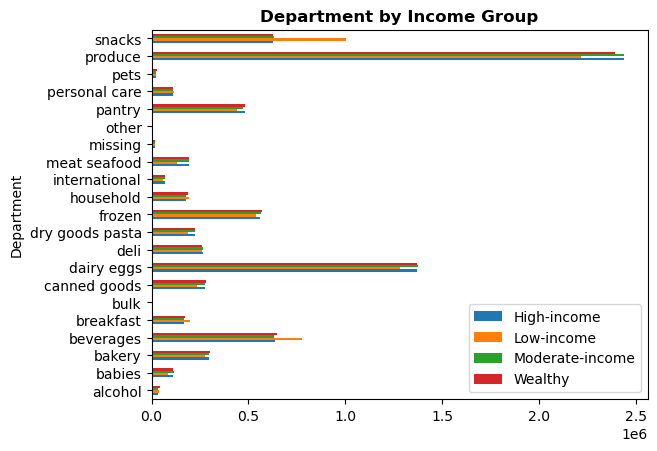

In [34]:
# Creating a bar chart of department divided by income group

bar_department_income = crosstab_department_income.plot.barh()
plt.ylabel('Department')
plt.legend()
plt.title('Department by Income Group', fontweight = 'bold')
plt.show()

In [74]:
# Exporting bar_department_income

bar_department_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_income.png'))

In [19]:
# Recall the crosstab between the 'income_group' and 'age_group' column 

crosstab_income_age = pd.crosstab(df_project_all['income_group'], df_project_all['age_group'], dropna = False)
crosstab_income_age

age_group,30-39 years,40-49 years,50-59,60-69 years,70+ years,Less than 30 years
income_group,,,,,,
High-income,346749,1673885,1786167,1727402,2159887,407060
Low-income,2347945,824157,691507,654404,791375,2791826
Moderate-income,2321798,826032,650851,664150,815754,2822622
Wealthy,57259,1785163,1935650,1941308,2312975,68933


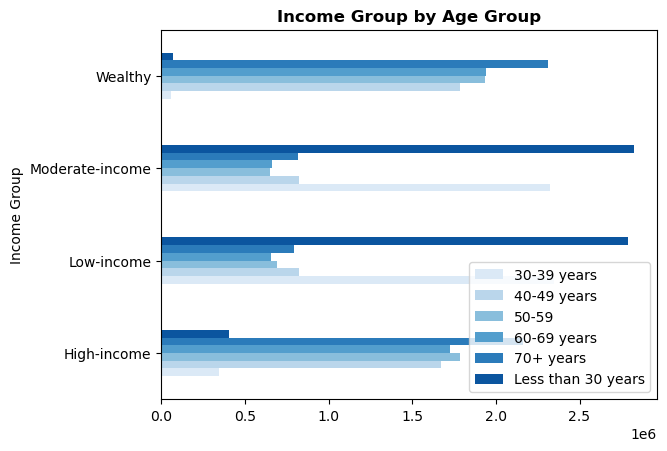

In [20]:
# Recreate a data visualization for income group and age group for analysis purpose

bar_age_income = crosstab_income_age.plot.barh(color = sns.color_palette('Blues', 6))
plt.ylabel('Income Group')
plt.legend()
plt.title('Income Group by Age Group', fontweight = 'bold')
plt.show()

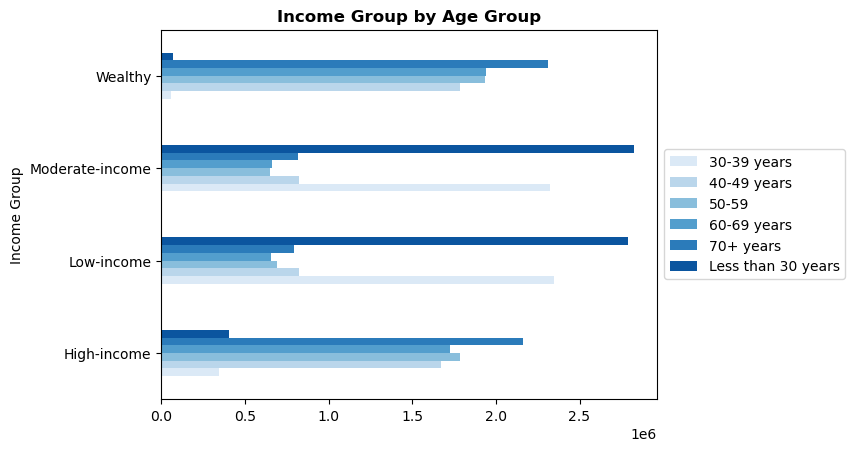

In [21]:
# Recreate a data visualization for income group and age group for analysis purpose

bar_age_income2 = crosstab_income_age.plot.barh(color = sns.color_palette('Blues', 6))
plt.ylabel('Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Income Group by Age Group', fontweight = 'bold')
plt.show()

In [75]:
# Exporting bar_age_income2

bar_age_income2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_income2.png'))

#### Observation: 
Through the cross tabs and the figures above, it can be seen that the distribution of department results according to income groups is fairly even, except for:
- Snacks and beverages: Both departments are dominated by low-income people, the majority of whom are young people and those in their 30s
- In contrast, low-income people (young people and those in their 30s) contribute the least income to produce, meat seafood and dairy eggs departments. My assumption is that the prices coming from these three departments are quite expensive as we know in our daily lives (seafood and dairy are expensive) and their incomes are still low. Also some people at young age pay less attention to their health, that's why most of them fall into snack department

### 5.4 Customer Profiling: Number of dependants

In [22]:
df_project_all['dependants_number'].describe()

count    3.240486e+07
mean     1.501896e+00
std      1.118865e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependants_number, dtype: float64

In [23]:
df_project_all['family_status'].head()

0    married
1    married
2    married
3    married
4    married
Name: family_status, dtype: object

In [24]:
df_project_all['family_status'].tail()

32404854     single
32404855    married
32404856    married
32404857    married
32404858    married
Name: family_status, dtype: object

In [30]:
# Create a crosstab between the 'family_status' and 'income_group' column

crosstab_family_status_income = pd.crosstab(df_project_all['family_status'], df_project_all['income_group'], dropna = False)
crosstab_family_status_income

income_group,High-income,Low-income,Moderate-income,Wealthy
family_status,,,,
divorced/widowed,986160,352814,373721,1059117
living with parents and siblings,102403,693454,736798,17948
married,5963347,5385903,5357517,6049986
single,1049240,1669043,1633171,974237


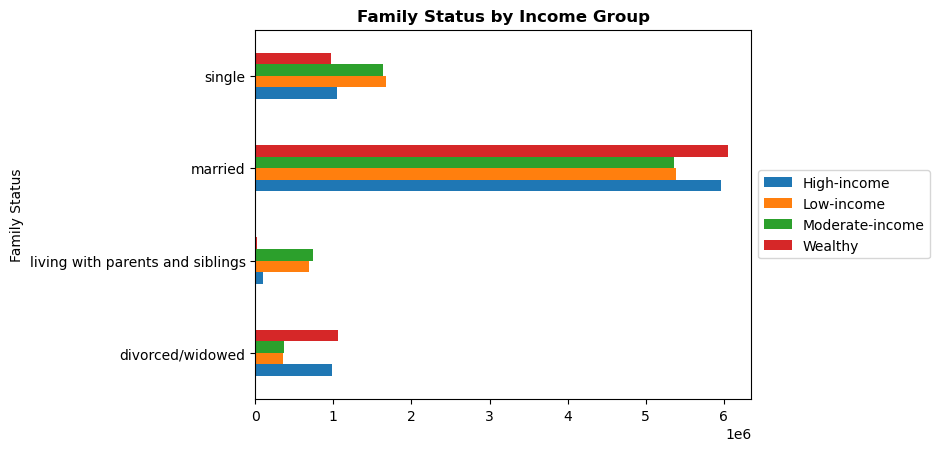

In [35]:
# Creating a bar chart of family status divided by income group


bar_family_status_income = crosstab_family_status_income.plot.barh()
plt.ylabel('Family Status')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Family Status by Income Group', fontweight = 'bold')
plt.show()

In [76]:
# Exporting bar_family_status_income

bar_family_status_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_status_income.png'))

#### Observations:
1. The majority of customers are married
2. The patterns of marriage and divorced/widowed are almost the same, dominated by high-income people. This makes sense because both of these categories are mostly demonstrated by older people who may already have financial stability.And for married couples maybe they also have 2 incomes at the same time from both the wife and husband.
3. In contrast, the pattern of being single and living with parents and siblings is almost the same. The majority of their income is in the low-moderate group.

In [43]:
crosstab_age_family_status = pd.crosstab(df_project_all['age_group'], df_project_all['family_status'], dropna = False)
crosstab_age_family_status

family_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
30-39 years,0,0,3805151,1268600
40-49 years,0,0,3841539,1267698
50-59,0,0,3788012,1276163
60-69 years,1262445,0,3724819,0
70+ years,1509367,0,4570624,0
Less than 30 years,0,1550603,3026608,1513230


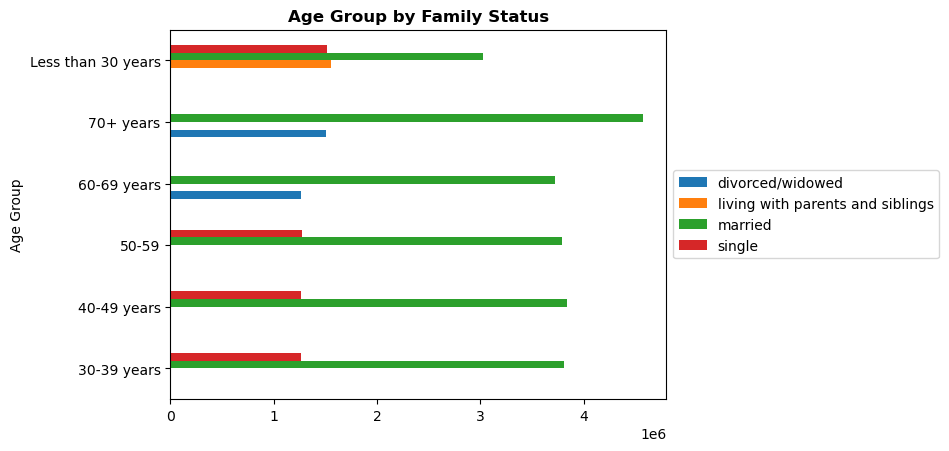

In [44]:
# Creating a bar chart of age group divided by family group

bar_age_family_status = crosstab_age_family_status.plot.barh()
plt.ylabel('Age Group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Age Group by Family Status', fontweight = 'bold')
plt.show()

In [77]:
# Exporting bar_age_family_status

bar_age_family_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_family_status.png'))

#### Observations:
1. Married couples are spread evenly across all age groups
2. Now it even makes sense that young people (less than 30 years old) fall into the category of living with parents and siblings, therefore in the previous bar chart they seem to have a low-moderate income because maybe some of them are still students who didn't make much money

In [29]:
df_project_all.groupby('family_status').agg({'dependants_number' : ['mean', 'max', 'min', 'sum']})

dependants_number                  
                                              mean max min       sum
family_status                                                       
divorced/widowed                          0.000000   0   0         0
living with parents and siblings          1.988546   3   1   3083446
married                                   2.003154   3   1  45585271
single                                    0.000000   0   0         0

In [36]:
family_profile = []

for value in df_project_all['dependants_number']:
    if value == 0:
        family_profile.append('independent')
    else:
        family_profile.append('family')

In [37]:
df_project_all['family_profile'] = family_profile

In [38]:
df_project_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [39]:
df_project_all['family_profile'].value_counts()

family         24307356
independent     8097503
Name: family_profile, dtype: int64

In [40]:
# Create a crosstab between the 'family_profile' and 'family_status' column

crosstab_fam_status_fam_profile = pd.crosstab(df_project_all['family_profile'], df_project_all['family_status'], dropna = False)
crosstab_fam_status_fam_profile 

family_status,divorced/widowed,living with parents and siblings,married,single
family_profile,,,,
family,0,1550603,22756753,0
independent,2771812,0,0,5325691


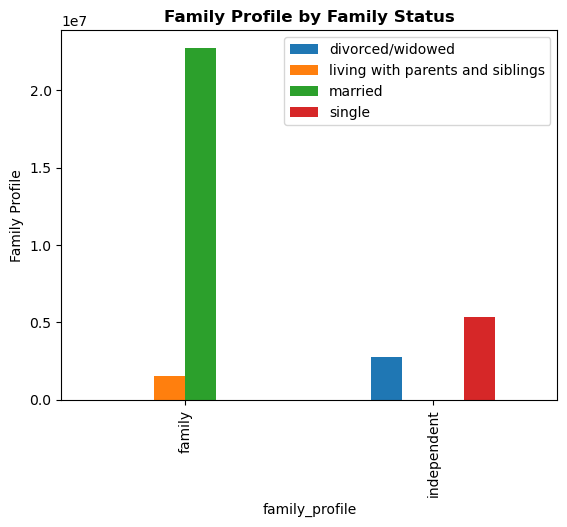

In [41]:
# Creating a bar chart of family profile divided by family status

bar_fam_status_fam_profile  = crosstab_fam_status_fam_profile .plot.bar()
plt.ylabel('Family Profile')
plt.legend()
plt.title('Family Profile by Family Status', fontweight = 'bold')
plt.show()

In [78]:
# Exporting bar_fam_status_fam_profile

bar_fam_status_fam_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status_fam_profile.png'))

In [45]:
# Create a crosstab between the 'income_group' and 'loyalty_flag' column

crosstab_income_loyalty = pd.crosstab(df_project_all['income_group'], df_project_all['loyalty_flag'], dropna = False)
crosstab_income_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
High-income,2610705,1510039,3980406
Low-income,2469238,1738745,3893231
Moderate-income,2628589,1488406,3984212
Wealthy,2575561,1506800,4018927


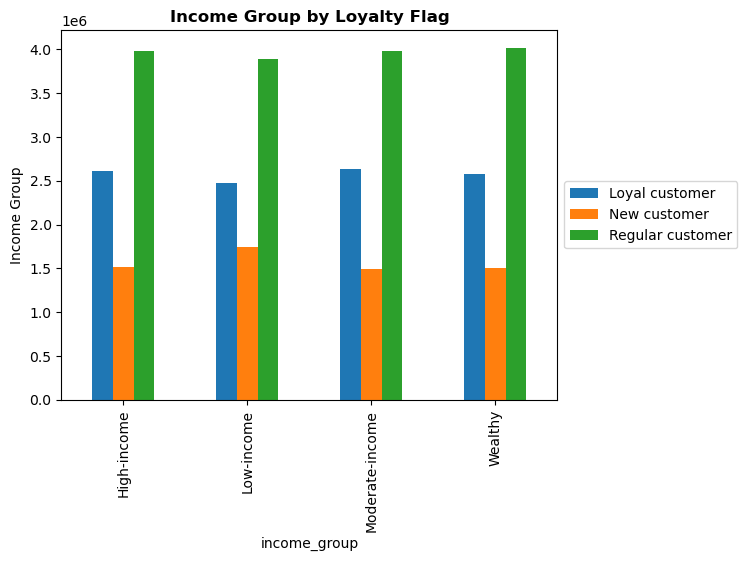

In [48]:
# Creating a bar chart of income group divided by loyalty flag

bar_income_loyalty = crosstab_income_loyalty .plot.bar()
plt.ylabel('Income Group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Income Group by Loyalty Flag', fontweight = 'bold')
plt.show()

In [79]:
# Exporting bar_income_loyalty

bar_income_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_loyalty.png'))

#### Observation: It seems like income groups do not affect the level of loyaliness since all of them have the same patterns


In [49]:
# Create a crosstab between the 'department' and 'family_status' column

crosstab_department_fam_status = pd.crosstab(df_project_all['department'], df_project_all['family_status'], dropna = False)
crosstab_department_fam_status

family_status,divorced/widowed,living with parents and siblings,married,single
department,,,,
alcohol,12615,8896,105682,26503
babies,35326,20146,297162,71168
bakery,100401,56142,821881,194004
beverages,231025,124629,1889052,443417
breakfast,59498,34731,493725,115079
bulk,2765,1674,24621,5513
canned goods,89259,51190,752030,175579
dairy eggs,461911,260787,3788598,887451
deli,90818,50415,735689,174327


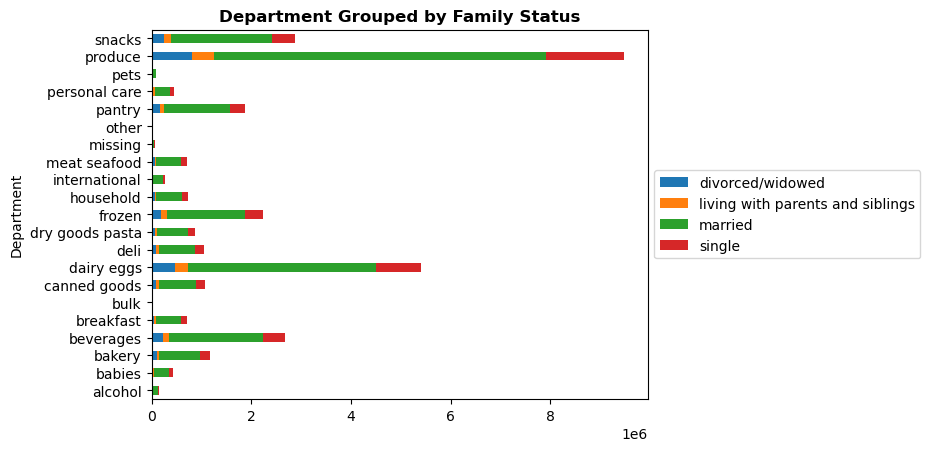

In [51]:
# Creating a bar chart of department divided by family status

bar_department_fam_status = crosstab_department_fam_status.plot.barh(stacked = True)
plt.ylabel('Department')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Department Grouped by Family Status', fontweight = 'bold')
plt.show()

In [80]:
# Exporting bar_department_fam_status

bar_department_fam_status.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department_fam_status.png'))

#### Observation: Married couples dominate all departments

### 5.5 Profiling the Ordering Time

In [55]:
df_project_all['busiest_days'].value_counts()

Regularly days    12916111
Busiest days      11864412
Slowest days       7624336
Name: busiest_days, dtype: int64

In [56]:
df_project_all['busiest_day'].value_counts()

Regularly busy    22416875
Busiest day        6204182
Least busy         3783802
Name: busiest_day, dtype: int64

In [59]:
df_project_all['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

Text(0.5, 1.0, 'Order Time By Day')

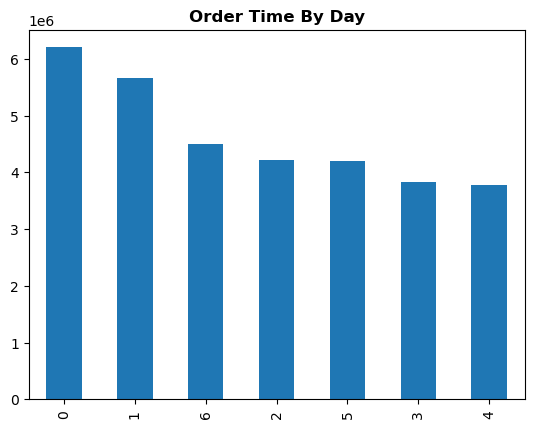

In [67]:
# Creating a bar chart of orders_day_of_week

bar_orders_day = df_project_all['orders_day_of_week'].value_counts().plot.bar()
plt.title('Order Time By Day', fontweight = 'bold')

In [81]:
# Exporting bar_orders_day

bar_orders_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_day.png'))

#### Observation: majority of purchase time falls on weekends: (0 --> Saturday and 1 --> Sunday)

Text(0.5, 1.0, 'Order Time By Day')

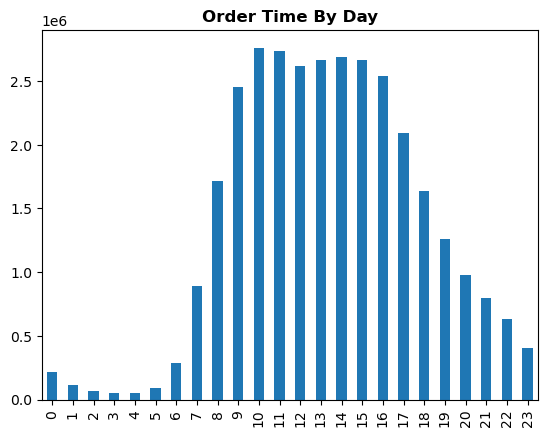

In [71]:
# Creating a bar chart of order_hour_of_day

bar_order_hour = df_project_all['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.title('Order Time By Day', fontweight = 'bold')

In [82]:
# Exporting bar_order_hour

bar_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_hour.png'))

#### Observation: Peak purchasing time falls during business hours from 9am to 5pm

In [84]:
df_project_all.shape

(32404859, 36)

In [86]:
df_project_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'dependants_number', 'family_status', 'income', 'age_group', 'region',
       'income_group', 'department', 'family_profile'],
      dtype='object')

In [100]:
df_project_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'dataset_final.pkl'))

OSError: [Errno 28] No space left on device